In [1]:
from comet_ml import Experiment

experiment = Experiment(api_key="HIZapbzNjFips0c32Co7gXkQZ",
                        project_name="sirius-hw-1", workspace="maximartemev")


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import nn
import torch.functional as F

import torchvision
from torchvision import transforms

COMET INFO: old comet version (2.0.15) detected. current: 2.0.16 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/maximartemev/sirius-hw-1/4a8421aa878a4297b7534d36db2c4576



#### Атеншон

Если вы учите не на гпу, перейдите от CIFAR-100 на CIFAR-10

В этой тетрадке вам предлагается обучить простую нейронную сверточную сеть на датасете CIFAR-100

In [2]:
# Заранее собранные датасеты

train_set = torchvision.datasets.CIFAR100(root='./cifar100-data',
                                          train=True,
                                          download=True,
                                          transform=transforms.ToTensor())
test_set = torchvision.datasets.CIFAR100(root='./cifar100-data',
                                         train=False,
                                         download=True, 
                                         transform=transforms.ToTensor())


Files already downloaded and verified
Files already downloaded and verified


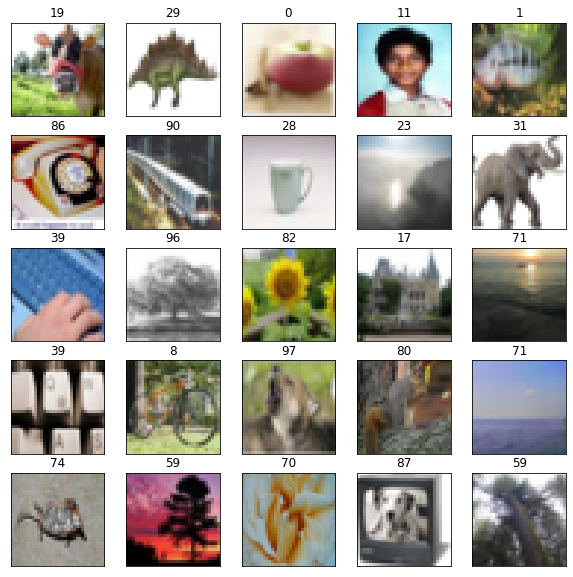

In [3]:
# CIFAR 100, 32x32 картинки

plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(train_set):
    if index >= 25:
        break
    plt.subplot(5, 5, index + 1)
    plt.imshow(image.permute(1, 2, 0))
    plt.yticks([])
    plt.xticks([])
    plt.title(str(label))
plt.show()

In [4]:
# Соберем все датасеты в даталоадере, соберем батчи 

BATCH_SIZE = 32

train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE)

In [5]:
batch = next(iter(train_loader))
# Первый элемент батча - тензор с картинками
print(batch[0].shape)
# Второй - тензор с правильными лейблами
print(batch[1].shape)

torch.Size([32, 3, 32, 32])
torch.Size([32])


In [6]:
class CifarModel(nn.Module):
    def __init__(self, ):
        super(CifarModel, self).__init__()
        # YOUR CODE
        self.emb = nn.Sequential(
            nn.Conv2d(3, 32, 7, padding=3),
            nn.LeakyReLU(0.02),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 5, padding=2),
            nn.LeakyReLU(0.02),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.LeakyReLU(0.02),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.LeakyReLU(0.02),
            nn.BatchNorm2d(64),
        )
        
        self.fc = nn.Sequential(
            nn.Linear(8*8*64, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 100),
        )
        
    def forward(self, x):
        # YOUR CODE
        return self.fc(self.emb(x).view(x.shape[0], -1))
        

In [7]:
model = CifarModel()

Теперь здесь определите какой лосс, какую метрику качества и какой оптимизатор вы будете использовать

In [ ]:
criterion = # YOUR CODE
metric = # YOUR CODE
optimizator = # YOUR CODE

In [8]:
from sklearn.metrics import accuracy_score

criterion = nn.CrossEntropyLoss()
metric = accuracy_score
optimizator = torch.optim.Adam(model.parameters())

In [9]:
from tqdm import tqdm_notebook

In [10]:
%time

model(batch[0]).shape

CPU times: user 8 µs, sys: 7 µs, total: 15 µs
Wall time: 67.7 µs


torch.Size([32, 100])

In [19]:
for epoch in tqdm_notebook(range(20)):
    experiment.log_current_epoch(epoch)
    with experiment.train():
        for ind, (image, label) in tqdm_notebook(enumerate(train_loader), leave=False):
            pred = model(image)
            loss = criterion(pred, label)
            loss.backward()
            optimizator.step()
            optimizator.zero_grad()
            experiment.log_metric("loss", loss.item(), step=ind)
            experiment.log_metric("accuracy", metric(label.data.numpy(),
                                                     torch.argmax(pred, dim=1).data.numpy()),
                                  step=ind)
    with experiment.test():
        accs = []
        for ind, (image, label) in enumerate(train_loader):
            pred = model(image)
            accs.append(metric(label.data.numpy(),
                               torch.argmax(pred, dim=1).data.numpy()))
        experiment.log_metric("accuracy", np.mean(accs), step=ind)


KeyboardInterrupt: 

In [22]:
np.mean(accs)

0.22013888888888888

In [20]:
1

1

Здесь напишите свой цикл обучения, обучайте модель как минимум 10 эпох, логируйте качество модели на трейне и на тесте.

Подумайте про то, чтобы перестать использовать обычные питоновские графики для логирования.

Один из хороших вариантов - comet.ml, штука позволяет сохранять все метрики/лоссы и отрисовывать их в веб-тулзе

![image](https://embedwistia-a.akamaihd.net/deliveries/a8e5eadf35dada5083651913fd9258b6.webp?image_crop_resized=1022x838)

In [26]:
# YOUR CODE